In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [3]:
sigmoid(0)

0.5

In [4]:
sigmoid(1000)

1.0

In [8]:
sigmoid(-600)

2.6503965530043108e-261

In [9]:
x = np.arange(-10, 10, 0.1)

In [12]:
y = sigmoid(x)

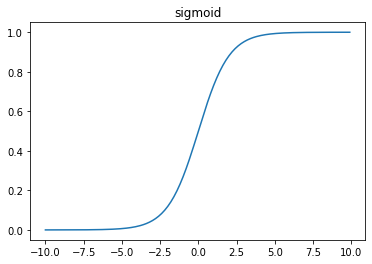

In [13]:
plt.plot(x, y)
plt.title('sigmoid')
plt.show()

In [ ]:
y = 1
y_hat = 0.98

In [14]:
def log_loss(y, y_hat):
    loss =  y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
    return -loss

In [15]:
log_loss(1, 0.98)

0.020202707317519466

In [16]:
log_loss(1, 0.5)

0.6931471805599453

In [17]:
log_loss(1, 0.01)

4.605170185988091

In [18]:
log_loss(0, 0.98)

3.912023005428145

In [19]:
log_loss(0, 0.4)

0.5108256237659907

In [20]:
log_loss(0, 0.1)

0.10536051565782628

In [22]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [21]:
def hypothesis(X, weights):
    '''
    X :  (n, d+1)
    weights : (d+1, 1)
    '''
    z =  np.dot(X, weights)
    return sigmoid(z)

In [23]:
def error(X, Y, weights):
    '''
    X :  (n, d+1)
    Y : (n, 1)
    weights : (d+1, 1)
    '''
    Y_hat = hypothesis(X, weights)
    
    err = np.mean(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))
    
    return -err

In [24]:
def gradients(X, Y, weights):
    Y_hat = hypothesis(X, weights)
    grads = np.dot( X.T ,  (Y_hat - Y )   )    
    return 2*grads/len(Y)

In [25]:
def gradient_descent(X, Y, max_itr = 200, learning_rate = 0.01):
    
    # step 1 : init() randomly
    weights = np.zeros((X.shape[1], 1))
    error_list = []
    
    # step 2 repeate until convergence
    for i in range(max_itr):
        
        e = error(X, Y, weights)
        error_list.append(e)
        
        grads = gradients(X, Y, weights)
        
        weights = weights - learning_rate*grads
    
    return weights, error_list

In [26]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)

#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


In [27]:
X[:5]

array([[ 1.22167239, -0.4757541 ],
       [-0.2292072 , -1.85663378],
       [-1.34913896,  0.50458721],
       [ 0.31402206, -1.62029248],
       [ 1.13807877, -0.99148158]])

In [29]:
ones = np.ones((500, 1))
X_new = np.hstack((ones,X))
X_new.shape

(500, 3)

In [35]:
opt_weights, loss = gradient_descent(X_new, y, learning_rate=0.1, max_itr = 300)

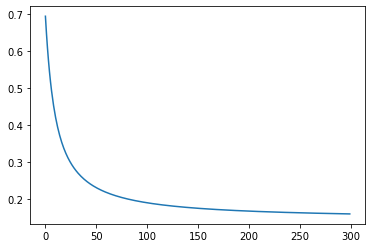

In [36]:
plt.plot(loss)

In [37]:
opt_weights

array([[0.56216131],
       [3.47085501],
       [0.39783259]])

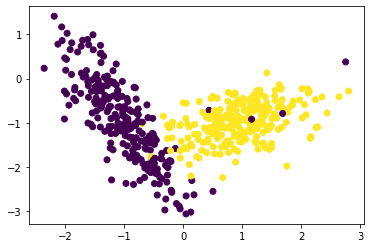

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()